In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data
df = pd.read_csv('data/training_data.csv', index_col=0)

In [3]:
#looking at target variable
df.Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [4]:
#renaming the columns
columns = df.loc['ID'].values #I'll be saving these column names for the test set

df.columns = columns 

#dropping that row
df.drop(['ID'], inplace = True)

In [5]:
#renaming the target value 
df = df.rename(columns = {'default payment next month': 'DEFAULT'})

In [6]:
df.dtypes.head(2)

LIMIT_BAL    object
SEX          object
dtype: object

In [7]:
#renaming the other columns based on their descriptions:
df = df.rename(columns = {'PAY_0':'PAYSTATUS_SEP','PAY_2':'PAYSTATUS_AUG', 'PAY_3':'PAYSTATUS_JUL', 'PAY_4':'PAYSTATUS_JUN', 'PAY_5':'PAYSTATUS_MAY', 'PAY_6':'PAYSTATUS_APR',
                         'BILL_AMT1':'BILLAMT_SEP', 'BILL_AMT2':'BILLAMT_AUG','BILL_AMT3':'BILLAMT_JUL', 'BILL_AMT4':'BILLAMT_JUN', 'BILL_AMT5':'BILLAMT_MAY', 'BILL_AMT6':'BILLAMT_APR',
                         'PAY_AMT1': 'PAYAMT_SEP', 'PAY_AMT2': 'PAYAMT_AUG', 'PAY_AMT3': 'PAYAMT_JUL', 'PAY_AMT4': 'PAYAMT_JUN', 'PAY_AMT5': 'PAYAMT_MAY', 'PAY_AMT6': 'PAYAMT_APR' })

#converting columns to their appropriate dtypes
df = df.astype({'LIMIT_BAL': np.float32 , 'BILLAMT_SEP':np.float32, 'BILLAMT_AUG':np.float32, 'BILLAMT_JUL':np.float32, 'BILLAMT_JUN':np.float32,
                'BILLAMT_MAY':np.float32, 'BILLAMT_APR':np.float32, 'PAYAMT_SEP':np.float32, 'PAYAMT_AUG':np.float32, 
               'PAYAMT_JUL':np.float32, 'PAYAMT_JUN':np.float32, 'PAYAMT_MAY':np.float32, 'PAYAMT_APR':np.float32})

In [8]:
df.dtypes.head()

LIMIT_BAL    float32
SEX           object
EDUCATION     object
MARRIAGE      object
AGE           object
dtype: object

Before I start cleaning I am going to evaluate the target variable.

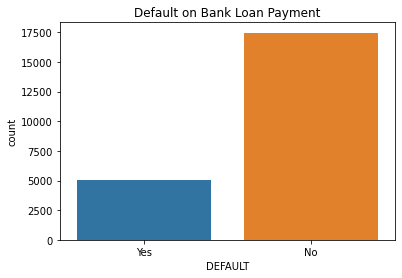

In [9]:
fig, ax = plt.subplots()
sns.countplot(df['DEFAULT'])
ax.set_title('Default on Bank Loan Payment')
ax.set_xticklabels(['Yes', 'No']);

In [10]:
print(df[df['DEFAULT'] == '1'].shape[0] / df.shape[0])

0.22347659895995378


The dataset is imbalanced. The majority of the people do not default on their payments. There is approximately an 80/20% imbalance in the dataset in favor of NONDEFAULTERS. I am going to set my class_weight parameter to 'balanced' to try to make a more even playing field. For now, I am going to clean the data as is so no major cleaning changes would be affected.